In [16]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

## Exercise 2.1

In [17]:
# Arms rewards
INTERVALS = [(-4,3),(1,5),(2,3),(-2,5),(0,4),(1,4),(3,7)]

# Expected value of every arm
arms_expected = np.zeros(7)
for x, interval in enumerate(INTERVALS):
    arms_expected[x] = (interval[-1] + interval[0])/2

Expected reward for each arm

In [18]:
arms_expected

array([-0.5,  3. ,  2.5,  1.5,  2. ,  2.5,  5. ])

Expected reward random action

In [19]:
arms_expected.mean()

2.2857142857142856

## Exercise 2.2

In [110]:
# Draw sample from reward interval
def get_reward(action):
    interval = INTERVALS[action]
    return np.random.randint(interval[0], interval[1])

# Get the greedy action
def get_greedy_action(Q):    
    avg_rews = [sum(arm_rews) / len(arm_rews) if len(arm_rews) > 0 else -np.inf for arm_rews in Q]
    action = avg_rews.index(max(avg_rews))
    return action

def compute_action(Q, greedy=True):
    if greedy:
        action = get_greedy_action(Q)
    else:
        action = np.random.randint(0,7)
    
    # Sample new reward for
    # the given action
    reward = get_reward(action)

    # Update Q table
    Q[action].append(reward)
        
        
colors = ["-r", "-b", "-c", "-g","-m", "-y", "-y", "-k"]
XYs = [[[], []]] * 8

def save_usage(Q, count):

    percentages = [0] * 7
    
    for idx in range(len(Q)):
        if len(Q[idx]) != 0:
            percentages[idx] = sum(Q[idx]) / len(Q[idx])
            
    print(percentages)
    print(Q)
    # Plot percentage arms
    for idx in range(len(Q)):
        XYs[idx][0].append(count)
        XYs[idx][1].append(percentages[idx])
    
    XYs[7][0].append(count)
    XYs[7][1].append(np.concatenate(Q).ravel().mean())    

def show_usage():
    for idx, color in enumerate(colors):
        # Plot avarage result
        plt.plot(XYs[idx][0], XYs[idx][1], color)
        plt.show()
    

In [ ]:
# Action/Reward table
Q = [[]] * 7

# Epsilon
e = 0.1

for x in range(2000):
    # Exploit or Explore
    if np.random.uniform(0,1) > 0.1:
        #TODO: exploit
        compute_action(Q, True)
        
    else: 
        # Choose random action (i.e. arm)
        compute_action(Q, False)
    
    if x % 100 == 0:
        save_usage(Q, x)

show_usage()

In [113]:
a = [
    [1, 2],
    [],
    [0, 3],
    [0,5]
]

In [125]:
compute_action(a)
a

[[1, 2, -2], [], [0, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2], [0, 5, -1]]

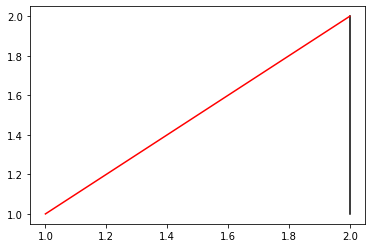

In [117]:
plt.plot([2, 2], [1, 2], "-k")
plt.plot([1, 2], [1, 2], "-r")
plt.show()

In [99]:
l = [[[], []]] * 8
l[7][0].append(1)